# Iris Flowers Classification ML Project



Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris <br>
Datasetlink NewWebsite : https://archive-beta.ics.uci.edu/ml/datasets/iris

**Author**: Nikhil Raj (Data Scientist)

# Import Libraries/Packages


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

# Description of the Data

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

<b>Attribute Information:</b><br>

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm




Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:<br>

1) Iris Setosa<br>
2) Iris Versicolour<br>
3) Iris Virginica<br>


![Pic1.jpg](Pic1.jpg)

# Loading the Dataset

In [12]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape

(150, 6)

# Data Preprocessing

In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


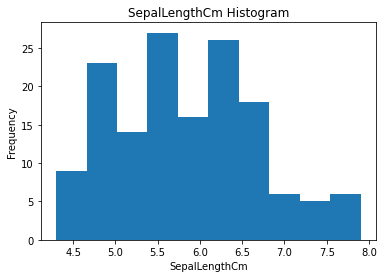

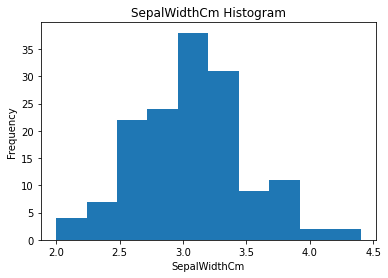

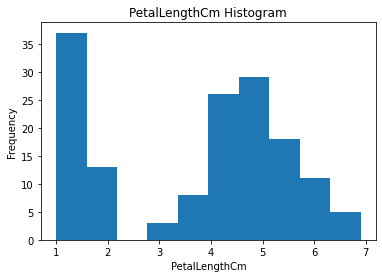

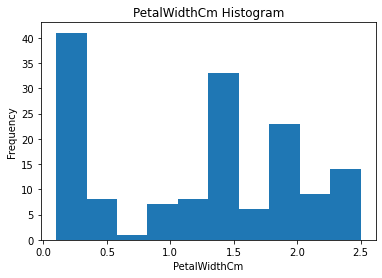

In [36]:
for column in list(df.columns)[1:-1]:
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(column + " Histogram")
    # Show plot
    plt.show()

In [42]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [43]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

array([<AxesSubplot:>], dtype=object)

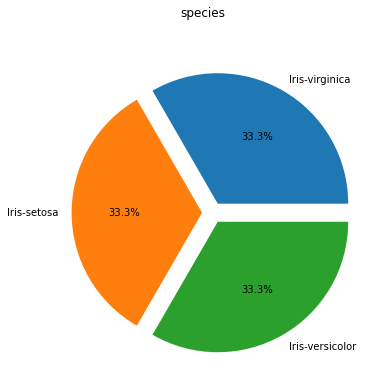

In [57]:
df["Species"].value_counts().plot.pie(subplots=True, figsize=(11, 6), explode = [0.08,0.08,0.08], autopct = '%1.1f%%', title = "species", ylabel = "")

# Let's see the correlation of all the columns in the dataframe

In [58]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


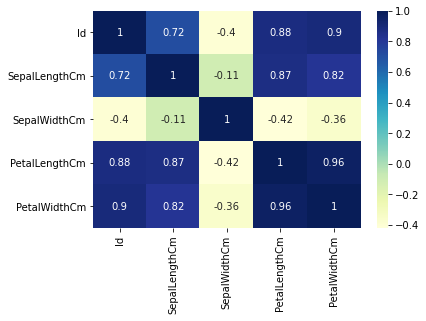

In [65]:
#Correlation in the form of the Heat Map
# import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is high positive correlation for Petal width with Sepal length and Petal length. Also, correlation between Petal length and Sepal length is positively high.

# Label encoding for categorical variables

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [69]:
# To display no. of samples on each class.
df['Species'].unique()

array([0, 1, 2])

In [72]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Splitting X and y into Train and Test datasets

In [86]:
# Splitting dataset 
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.Species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [77]:
X_Train.shape

(110, 4)

In [78]:
X_Test.shape

(40, 4)

In [79]:
Y_Train.shape

(110,)

In [80]:
Y_Test.shape

(40,)

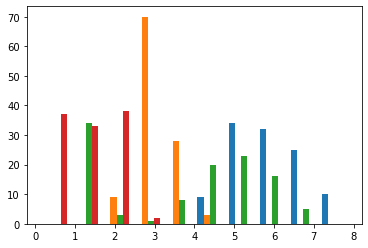

In [90]:
plt.hist(X_Train)
plt.show()

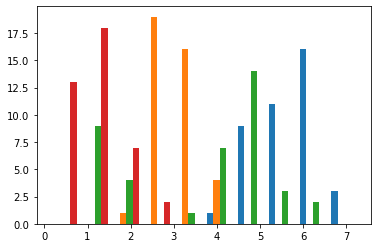

In [89]:
plt.hist(X_Test)
plt.show()

# Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

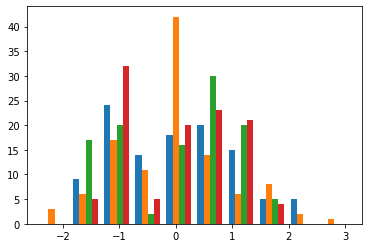

In [94]:
plt.hist(X_Train)
plt.show()

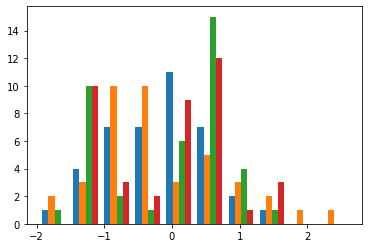

In [95]:
plt.hist(X_Test)
plt.show()

In [96]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

# Model Creation

# 1. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logreg = LogisticRegression(random_state=0)

In [100]:
logreg

LogisticRegression()

In [102]:
logreg_model = logreg.fit(X_Train, Y_Train)

In [103]:
logreg_model

LogisticRegression()

In [109]:
Y_Hat_logreg = logreg_model.predict(X_Test)
Y_Hat_logreg

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [125]:
accuracy_score(Y_Test, Y_Hat_logreg)        # is the testing accuracy is same as ''model.score(X_test, y_test)''

0.975

In [113]:
logreg_model.score(X_Train, Y_Train)        # Training Accuracy

0.9727272727272728

In [114]:
print(classification_report(Y_Test, Y_Hat_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [116]:
confusion_matrix(Y_Test,Y_Hat_logreg )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

# 2. KNN(K-Nearest Neighbours)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh

KNeighborsClassifier(n_neighbors=3)

In [119]:
neigh = neigh.fit(X_Train, Y_Train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [120]:
Y_Hat_neigh = neigh.predict(X_Test)
Y_Hat_neigh

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [128]:
neigh.score(X_Train, Y_Train)

0.9636363636363636

In [129]:
accuracy_score(Y_Test, Y_Hat_neigh)

0.975

In [130]:
print(classification_report(Y_Test, Y_Hat_neigh))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [131]:
confusion_matrix(Y_Test,Y_Hat_neigh)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

# 3. Decision Tree

In [132]:
# Importing DecisionTreeClassifier from sklearn.tree library and creating an object of it  with hyper parameters criterion,splitter and max_depth.

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

In [133]:
# model training
dec_tree.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [134]:
# Predicting
Y_Hat_dec_tree=dec_tree.predict(X_Test)
Y_Hat_dec_tree

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [135]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Hat_dec_tree)*100)

Accuracy: 97.5


In [136]:
print(classification_report(Y_Test, Y_Hat_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [137]:
confusion_matrix(Y_Test, Y_Hat_dec_tree)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

# 4. Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
nav_byes = GaussianNB()

In [139]:
# model training
nav_byes.fit(X_Train, Y_Train)

GaussianNB()

In [142]:
# Predicting
Y_Hat_Test_nvb=nav_byes.predict(X_Test)
Y_Hat_Test_nvb

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [143]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Hat_Test_nvb)*100)

Accuracy: 100.0


In [144]:
print(classification_report(Y_Test, Y_Hat_Test_nvb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [145]:
confusion_matrix(Y_Test,Y_Hat_Test_nvb )

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]], dtype=int64)

# 5. Random Forest Classification

In [146]:
from sklearn.ensemble import RandomForestClassifier
Ran_for = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [147]:
# model training
Ran_for.fit(X_Train, Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [148]:
# Predicting
Y_Hat_Test_rf=Ran_for.predict(X_Test)
Y_Hat_Test_rf

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [149]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Hat_Test_rf)*100)

Accuracy: 97.5


In [150]:
print(classification_report(Y_Test, Y_Hat_Test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [151]:
confusion_matrix(Y_Test,Y_Hat_Test_rf )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

# 6. SVM

In [152]:
# Importing SVC from sklearn.svm library

from sklearn.svm import SVC
svm_model=SVC(C=500, kernel='rbf')

In [153]:
# model training
svm_model.fit(X_Train, Y_Train)

SVC(C=500)

In [154]:
# Predicting
Y_Hat_Test_svm=svm_model.predict(X_Test)
Y_Hat_Test_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [155]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Hat_Test_svm)*100)

Accuracy: 97.5


In [156]:
print(classification_report(Y_Test, Y_Hat_Test_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [157]:
confusion_matrix(Y_Test,Y_Hat_Test_svm )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

# Model Evaluation Results

| Model                        |Accuracy Score|
|------------------------------|--------------|
| Logistic Regression          |97.5          |
| KNN(K-Nearest Neighbours)    |97.5          |                               
| Decision Tree                |97.5          |
| Naive Bayes                  |100.0         |
| Random Forest                |97.5          |                           
| SVM                          |97.5          |                  
                

We got highest accuracy Score of 100 for **Naive Bayes**

# Conclusions

* Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.<br>

* PetalWidthCm was highly correlated with PetalLengthCm	

* PetalLengthCm was highly correlated with PetalWidthCm

* We tried with 6 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:<br> a) Iris Setosa<br> b) Iris Versicolour<br> c) Iris Virginica,<br>  based on the length and width of the flower's Petals and Sepals.
​

* We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN and SVM with Linear Kernel models with some hyper parameter tuning maybe due to small size of dataset.